<a href="https://colab.research.google.com/github/Baco23/github-course/blob/master/stock_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) 
#              to predict the closing stock price of a corporation(BBAS3) using the past 60 day stock price. 

In [1]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
df = web.DataReader('BBAS3.SA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,24.290001,23.650000,23.900000,24.290001,3540500.0,14.849312
2012-01-03,24.450001,24.049999,24.250000,24.180000,6289900.0,14.782056
2012-01-04,24.200001,23.809999,23.950001,24.059999,5238000.0,14.708705
2012-01-05,24.070000,23.540001,23.889999,23.809999,5287300.0,14.555871
2012-01-06,24.070000,23.129999,23.900000,23.209999,7910000.0,14.189066
...,...,...,...,...,...,...
2019-12-11,48.369999,47.560001,48.049999,47.849998,9979700.0,47.011875
2019-12-12,48.910000,47.860001,48.000000,48.910000,8498200.0,48.230885
2019-12-13,49.500000,48.360001,48.860001,48.529999,18029900.0,47.856159


In [3]:
#Get the number of rows and columns in the data set
df.shape

(1974, 6)

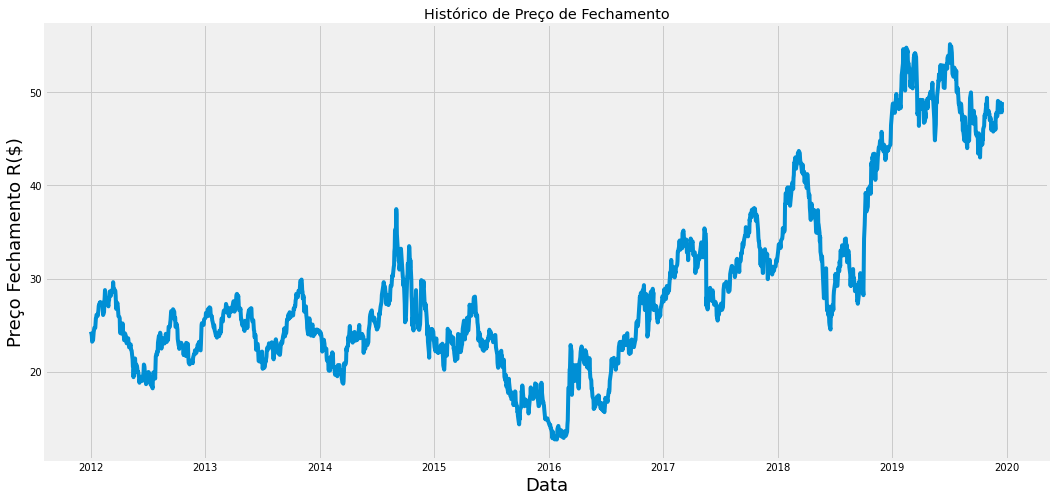

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Histórico de Preço de Fechamento')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço Fechamento R($)', fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1580

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.2728343 ],
       [0.27024483],
       [0.26741995],
       ...,
       [0.84345571],
       [0.82791899],
       [0.85334276]])

In [11]:
#Create the training data set
#Create the sclaed training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.2728343 , 0.27024483, 0.26741995, 0.26153483, 0.24741053,
       0.25188323, 0.26341807, 0.27189266, 0.27683614, 0.28248589,
       0.28248589, 0.30720339, 0.3083804 , 0.31544257, 0.31544257,
       0.31308851, 0.326742  , 0.33780601, 0.345339  , 0.34110171,
       0.34792843, 0.34604519, 0.34369113, 0.34016007, 0.34251412,
       0.34604519, 0.33168552, 0.31497175, 0.32226929, 0.34769302,
       0.36016949, 0.37806027, 0.36016949, 0.35428437, 0.34486818,
       0.33686441, 0.35004707, 0.35193031, 0.36181732, 0.37429379,
       0.3754708 , 0.36370056, 0.37311674, 0.37499998, 0.37735404,
       0.38017892, 0.39806969, 0.38370998, 0.37429379, 0.3808851 ,
       0.37758945, 0.37570621, 0.36370056, 0.34227871, 0.33027306,
       0.34604519, 0.34416195, 0.33498118, 0.3215631 , 0.31191151])]
[0.3095574486509359]

[array([0.2728343 , 0.27024483, 0.26741995, 0.26153483, 0.24741053,
       0.25188323, 0.26341807, 0.27189266, 0.27683614, 0.28248589,
       0.28248589, 0.30720339, 0.308

In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1520, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1520/1520 [==============================] - 63s 42ms/step - loss: 0.0015


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1520 to 1974
test_data = scaled_data[training_data_len - 60: , :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Shape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predict price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [27]:
#Get the root mean error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test ) **2 )
rmse

1.2961622809395572

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


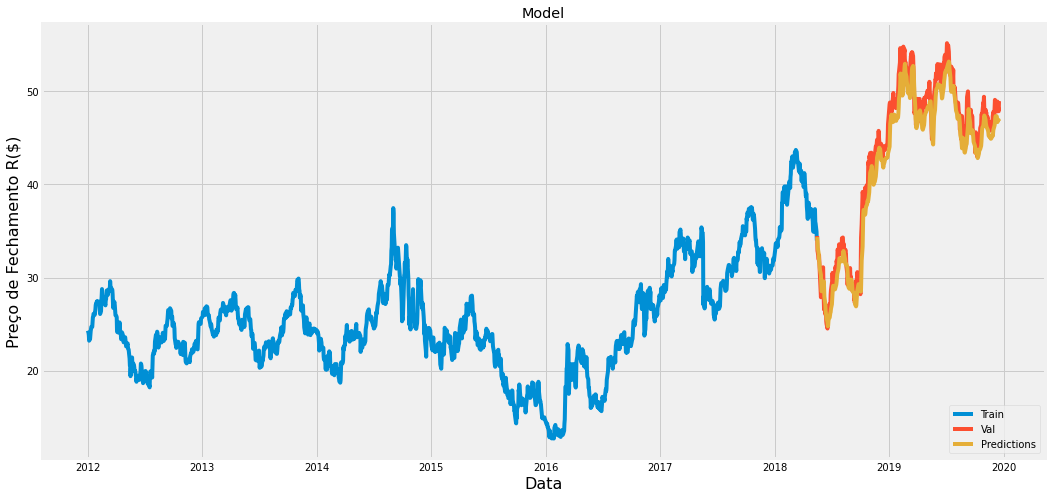

In [32]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8)) 
plt.title('Model')
plt.xlabel('Data', fontsize=16)
plt.ylabel('Preço de Fechamento R($)', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
#Show the valid and predictied prices
valid

,Close,Predictions
Date,,
2018-05-16,34.470001,34.343094
2018-05-17,32.869999,33.890640
2018-05-18,32.689999,33.187012
2018-05-21,31.910000,32.541706
2018-05-22,32.400002,31.889620
...,...,...
2019-12-11,47.849998,47.011383
2019-12-12,48.910000,46.700752
2019-12-13,48.529999,46.808338


In [35]:
#Get the quote
bb_quote = web.DataReader('BBAS3.SA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = bb_quote.filter(['Close'])
#Get the last 60day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the date
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[[46.977947]]


In [36]:
#Get the quote
bb_quote2 = web.DataReader('BBAS3.SA', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(bb_quote2['Close'])

Date
2019-12-18    50.639999
Name: Close, dtype: float64
